Før du starter, installer modulen ved å kjøre følgende linje

In [ ]:
%pip install -q xdai

<img src="gpr_vis_9.png" width = 100%>

# Med kunstig intelligens som labpartner

<a href="https://hazelbright.github.io/xdai">XDAI</a> og dette dokumentet er utviklet av Audun Skau Hansen, Stian Kogler, Hanne Røberg-Larsen, Steven H. R. Wilson, Elias Dalan, Ayla S. Coder, Hanan Gharayba og Maren H.S. Johnsen ved Universitetet i Oslo, våren 2023.

---

**Hvordan får vi mest mulig informasjon ut av et eksperiment med færrest mulig målinger? La oss se på en mulig fremgangsmåte som vil kunne hjelpe deg å løse dette problemet.**

Moderne maskinlærings(ML)-teknikker er gjerne basert på store **datasett**, bestående av "inn-data" i form av **målinger** (innen ML typisk kalt "features") med tilhørende "ut-data" i form av **resultater** (innen ML gjerne kalt "labels" eller "targets"). En ML-teknikk som kalles "supervised learning" har som mål å trene en **modell** så den kan gjøre **prediksjoner** i samsvar med datasettet. Du har kanskje vært borti dette før gjennom lineær regresjon, hvor modellen er et polynom.

<p></p>
<div>
    <img src="regression_model_4.png" width = 60%>
    <center>Maskinlæring: et datasett med målinger og resultater brukes for å lære opp en modell på datamaskinen.</center>
</div>
<p></p>
<p></p>



## Bayesiansk optimering

Eksperimenter kan imidlertid være tids- og arbeidskrevende, og vi har ikke alltid tilgang på store datasett. I tillegg kan det være en utfordring at vi ikke har forutsetning for å anta noe om den matematiske formen på resultatene. I slike tilfeller passer det å benytte noe som kalles **Gaussiske prosesser** (GP) som modell. Om vi benytter GP for å predikere et maksimum (topp- eller bunnpunkt) i målingene kalles dette for **Bayesiansk optimering** (BO). 

En fordel med denne metoden er at den kan ta måleusikkerhet med i betraktningen, noe som gjør den spesielt godt egnet til vårt formål.

Om du ønsker en mer detaljert introduksjon til Bayesiansk optimering kan vi anbefale følgende ressurser:

## Mål for denne notebooken

Denne notebooken vil lære deg å bruke den studentutviklede Python-modulen <a href="">XDAI</a> som støtte i ditt eksperimentelle arbeid. Notebooken er delt inn i fire deler:
1. **Eksperimentell design:**  planlegge målingene dine.
2. **Regresjon:** Tilpasse en Gaussisk prosess regressor (GPR) til datasettet ditt.
3. **Prediksjon:** Predikere en måling for optimalt resultat. (Bayesiansk optimering)
4. **Fortolkning** Visualisering av resultater.

Målet er å gjøre deg i stand til å finne optimale målepunkter for et bredt utvalg problemstillinger. Husk imidlertid at maskinlæringsmetoder ikke kan bli bedre enn de datasettene vi trener algoritmen på, så presise målinger og kritisk refleksjon rundt resultatene er avgjørende for å oppnå gode resultater.

<div class="alert alert-block alert-info">
    <h2> Diskusjonsoppgaver</h2>
<ul>    
 <li>Gi 3 eksempler på "inn-data" og "ut-data" (fra eksperiment, statistikk eller hverdagen) </li>
<li>Hvordan tolker du det å "predikere et maksimum i målingene"? </li>
<li>Hva innebærer det å optimere noe? Kan du gi noen eksempler på optimering? (hverdagslig eller vitenskapelig)</li>
<li>Kan du tenke deg tilfeller hvor du kan anta noe om formen på den matematiske formen på resultatene?</li>
<li>Kan du tenke deg tilfeller hvor du ikke kan anta noe om denne formen?</li>
<li>Hva legger du i det å "lære opp en modell på datamaskinen"? Hvordan tror du dette gjøres i praksis?</li>
    </ul>
</div>


## 1. **Eksperimentell design:** å planlegge målinger

Forestill deg at du vil finne en optimal sammensetning av målevariablene $\mathbf{x}_*$ som inngår i et eksperiment (for eksempel temperatur, trykk, konsentrasjoner, varighet og lignende). Hver måling er tidkrevende, så du ønsker å gjøre så få målinger som mulig. 

Du planlegger derfor et begrenset antall målinger i et område hvor du tror at den optimale sammensetningen befinner seg. Fra disse målingene vil du estimere en mer eksakt plassering av optimum. 

Det å planlegge disse målingene kalles **eksperimentell design**. Vi kommer i det følgende til å avgrense måleområdet med nedre og øvre terskelverdier i målevariablene. 

I en dimensjon er dette enkelt. Forestill deg for eksempel at du skal finne en optimal temperatur for veksten av en bakteriekultur. Du antar at bakteriene trives best ved romtemperatur, så du velger et måleintervall mellom 10 og 30 grader Celsius. Deretter gjør du målinger av vekstraten for 10 grader, 30 grader og kanskje for 20 grader (i midten av intervallet ditt). 

I det følgende bruker vi <a href="">XDAI</a> til å sette opp 1 og 2 dimensjoner. Du skal selve sette opp 3 dimensjoner.


In [1]:
import xdai

limits = [[10,30]]

grid_1d = xdai.designer.doe_grid( limits )

xdai.designer.html_table( grid_1d ) # display 1d table nicely formatted in noteobok

,20.0
,20.0
,20.0
,10.0
,30.0


In [20]:
limits = [[10,30], [0,1]]

grid_1d = xdai.designer.doe_grid( limits )

xdai.designer.html_table( grid_1d ) # display 2d table nicely formatted in noteobok

,20.0,0.5
,20.0,0.5
,20.0,0.5
,10.0,0.0
,30.0,0.0
,10.0,1.0
,30.0,1.0


In [21]:
limits = [ ... ]

grid_1d = xdai.designer.doe_grid( limits )

xdai.designer.html_table( grid_1d ) # display 1d table nicely formatted in noteobok

ValueError: x and y arrays must be equal in length along interpolation axis.

### Box-Behnken design

Det finnes flere ulike teknikker for å designe et eksperiment (se for eksempel <a href="https://www.itl.nist.gov/div898/handbook/pri/section5/pri5.htm">her</a>). I tilfellene over brukte vi et  komplett faktorielt design, hvor samtlige målinger innenfor de øvre og nedre terskelverdiene inngår. For tre målevariabler utgjør dette $3^3 = 27$ antall eksperimenter. 

I mange tilfeller holder det å kun benytte et utvalg av disse eksperimentene, og vi skal benytte det som kalles et Box-Behnken design []. Du setter det opp i 2 dimensioner med XDAI på følgende måte:

In [2]:
import xdai 
import numpy as np

In [3]:
import numpy as np

limits = [ [... ],[ ... ], [... ]] #sett inn dine grenser her

bb_grid = xdai.designer.doe_grid(limits, design = 2) # design=2 gir et Box-Behnken design
bb_grid

array([[3.5 , 1.25],
       [3.5 , 1.25],
       [3.5 , 1.25],
       [3.5 , 0.  ],
       [0.  , 1.25],
       [7.  , 1.25],
       [3.5 , 2.5 ]])

Du kan nå gjøre målingene som er vist i tabellen over. Dette gjør du manuelt, ved å følge instruksjoner labheftet. Når du er ferdig kan du legge inn resultatene i en numpy-array her:

In [ ]:
resultater = np.array([ ... ])

## 2. Regresjon

Du er nå klar for å bruke resultatene til å lage en modell. Vi skal benytte en Gaussisk Prosess Regerssor (GPR) fra XDAI modulen. Du setter den opp på følgende måte: 

Først, pass på at målinger og resultater ligger tilgjengelig som variabler:

In [160]:
# vi genererer et eksempeldatasett under. Erstatt dette med det du planlegger i labølvelsen.

målinger = xdai.designer.doe_grid([ [-.4,.4], [-.2,.2], [0,1]], design = 2)

resultater =  .1*(målinger[:,0]-.2)**2 + .1 * (målinger[:,1]+.1)**2 - (målinger[:,2]-.5)**2

Deretter, bruk xdai.gpr-modulen for å tilpasse datasettet. Box-Behnken-designet har tre repetisjoner i senter av måleområdet, noe vi vil benytte til å fininstille modellens parametere så vi kan etablere tillit til prediksjonene vi gjør med den. I første omgang gir vi derfor ikke modellen tilgang til disse tre målepunktene:

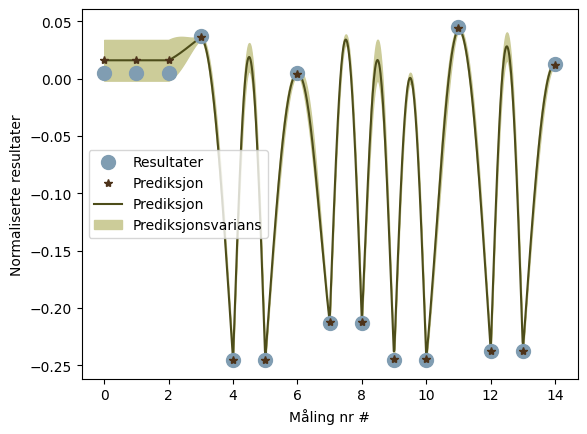

In [162]:

parametre = np.ones(målinger.shape[1])
måling_standardavvik = .001

x = målinger[3:] # målinger / input
y = -1*resultater[3:] # resultater / utput

# her initialiserer vi modellen
gpr = xdai.gpr.Regressor(x, y,measurement_standard_deviation=måling_standardavvik, params = parametre) 

# vi plotter til slutt resultatene

plt.figure()
# resultatene
plt.plot(resultater, "o", label = "Resultater", zorder = 4, markersize = 10, color = np.array([.1,.2,.3])**.3)

# prediksjonene
plt.plot(-1*gpr.predict(målinger), "*", label = "Prediksjon", zorder = 5, color = np.array([.3,.2,.1]))

X3p = interp1d(np.linspace(0,1,målinger.shape[0]), målinger.T)(np.linspace(0,1,målinger.shape[0]*50))

fx, fv = gpr.predict(X3p.T, return_variance = True) #predict results and variance


plt.plot(np.linspace(0,målinger.shape[0]-1,målinger.shape[0]*50),-1*fx,"-",  label = "Prediksjon", color = (.3,.3,.1))
plt.fill_between(np.linspace(0,målinger.shape[0]-1,målinger.shape[0]*50),-fx-fv,-fx+fv,  label = "Prediksjonsvarians", color = (.8,.8,.6))
plt.ylabel("Normaliserte resultater")
plt.xlabel("Måling nr #")
plt.legend()
plt.show()

<div class="alert alert-block alert-info">
    <h2> Diskusjonsoppgaver</h2>
<ul>    
 <li>Hva representerer de blå punktene og sorte stjernene i figuren over? Er de identiske? Hvordan forklarer du dette?</li>
<li>Den kontinuerlige linjen mellom resultatene er prediksjoner langs en linje trukket mellom målepunktene. Det er litt vanskelig å forstår fra koden hvordan dette fungerer i tre dimensjoner. Kan dere forklare det for hverandre i en dimensjon ved hjelp av en tavle? </li>
<li>Hvor er variansen i prediksjonene størst? Hvordan forklarer du dette?</li>
<li>Hvordan skiller resultat og prediksjon i de tre første målepunktene seg fra resten av datasettet? Kan du forklare hvordan denne forskjellen oppstår?</li>
<li>Kopier cellene over og tilpass skriptet så det kjører for 4 dimensjoner.</li>
    </ul>
</div>


### Trening

Vi vil nå finne de parametrene som gir best prediksjoner sammenliknet med det vi vet om de tre målingene i senter av boksen. Dette kan automatiseres (men krever en våken bruker dersom optimeringsalgoritmen foreslår urimelige verdier), noe vi gjør på følgende måte:

Optimerte parametere: [2.53384284 2.34783166 3.87707829]


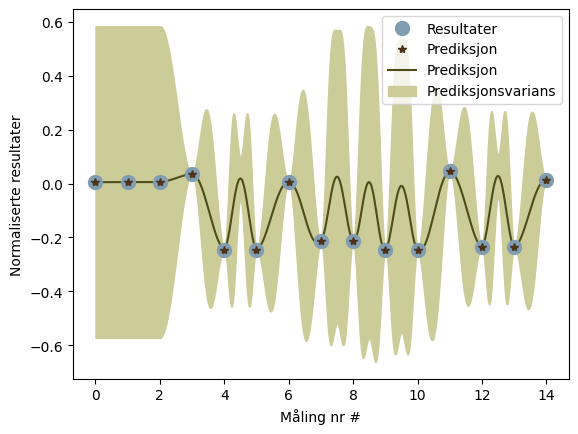

In [164]:
optimale_parametre = xdai.gpr.parameter_optimization(målinger,-resultater, params = parametre*.1, training_subset = np.arange(3,resultater.shape[0]),measurement_standard_deviation=måling_standardavvik) #, normalize_y = True)
print("Optimerte parametere:", params)

gpr = xdai.gpr.Regressor(x, y,measurement_standard_deviation=måling_standardavvik, params = optimale_parametre) 

# vi plotter til slutt resultatene

plt.figure()
# resultatene
plt.plot(resultater, "o", label = "Resultater", zorder = 4, markersize = 10, color = np.array([.1,.2,.3])**.3)

# prediksjonene
plt.plot(-1*gpr.predict(målinger), "*", label = "Prediksjon", zorder = 5, color = np.array([.3,.2,.1]))

X3p = interp1d(np.linspace(0,1,målinger.shape[0]), målinger.T)(np.linspace(0,1,målinger.shape[0]*50))

fx, fv = gpr.predict(X3p.T, return_variance = True) #predict results and variance


plt.plot(np.linspace(0,målinger.shape[0]-1,målinger.shape[0]*50),-1*fx,"-",  label = "Prediksjon", color = (.3,.3,.1))
plt.fill_between(np.linspace(0,målinger.shape[0]-1,målinger.shape[0]*50),-fx-fv,-fx+fv,  label = "Prediksjonsvarians", color = (.8,.8,.6))
plt.ylabel("Normaliserte resultater")
plt.xlabel("Måling nr #")
plt.legend()
plt.show()
#params = 0.001

<div class="alert alert-block alert-info">
<h2> Diskusjonsoppgave</h2>
<p>Hvordan endret modellen seg som følge av treningen? Ble prediksjonen i de tre første treningspunktene bedre eller dårligere? Hva med variansen?</p>
</div>

## 3. Prediksjon

Å gjøre en prediksjon betyr å forutsi noe ukjent basert på det vi allerede vet. Når modellen vår er trent er den i prinsippet i stand til å forutsi uttfallet av målinger utenfor de målepunktene vi har lagt inn i datasettet med en viss grad av sikkerhet. 

Ettersom prediksjoner fra modellen gjøres langt mer effektivt enn ekte eksperimenter i laboratoriet, kan vi be modellen om å forutsi hvilke målevariabler som gir høyest eller lavest resultater. Dette gjør vi på følgende måte:

In [188]:
bounds = np.array([[-2,-2,-2],[2,2,2]])

guess = målinger[np.argmin(resultater)]

    
opt, optfun, suc = gpr.predict_sample_optimum( guess,  xi = .1, bounds = bounds )
gpr.predict(opt.reshape(-1,3), return_variance = True)

(array([3.7435561e-19]), array([1.001]))

In [189]:
opt

array([1.76720634, 1.6136977 , 0.        ])

In [190]:
suc

True

In [191]:
optfun

-0.10004998750624611

In [192]:
resultater.max()

0.04500000000000001